# Rayleigh approximation numerical plots

In [1]:
import vsh
import numpy
from matplotlib import pyplot as plt
from test_fields import *
%matplotlib inline
#
rayleigh = lambda nratio, X : 2j/3*(nratio**2 -  1)/(nratio**2 + 2)*X**3

In [2]:
def plot_rayleigh_approx(X):
    nratio = np.linspace(1,8,101) + 1j
    term1 = 2j/3*(nratio**2 -  1)/(nratio**2 + 2)*X**3

    fig,ax=plt.subplots(figsize=(5,3),dpi=100,facecolor='w')
    _A = np.array([vsh.mie_sca(1, n, X) for n in nratio])[:,1]
    ax.plot(nratio.real, _A.imag/X**3, label=r'Im $f_l x^{-3}$')
    ax.plot(nratio.real, term1.imag/X**3,'--',label=r'Im $\frac{2i}{3}\frac{(n^2-1)}{n^2+2}$')
    ax.set_xlabel('Re(n)')
    ax.set_title('Im(F)')

    ax.plot(nratio.real, _A.real/X**3, label=r'Re $f_l x^{-3}$')
    ax.plot(nratio.real, term1.real/X**3,'--',label=r'Re $\frac{2i}{3}\frac{(n^2-1)}{n^2+2}$')
    ax.set_xlabel('Re(n)')
    ax.set_title('Size Parameter = {:.2f}'.format(X))

    ax.legend(loc='best', bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))

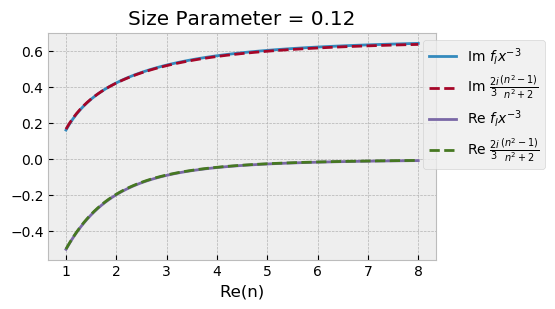

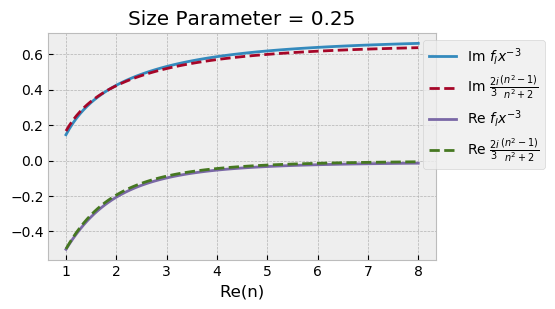

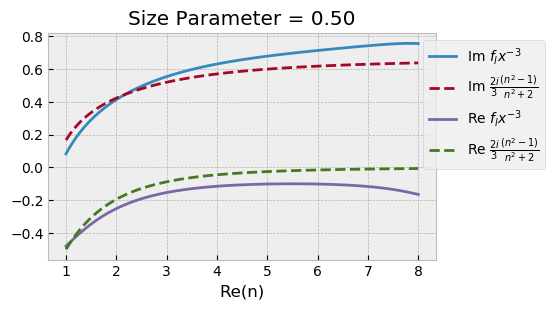

In [3]:
with plt.style.context('bmh'):
    for X in [0.125,0.25,0.5]:
        plot_rayleigh_approx(X)

In [4]:
twopi = 2*np.pi
R = np.linspace(0.01,0.8/twopi,9)
vol = 4*np.pi/3*R**3
maxL=5
theta = np.pi/4
# E_par = E_perp = 1
FarField_Series = np.array([vsh.far_field_mie(maxL,2., radius,[np.sin(theta),0.,np.cos(theta)],[0.,0.,-1],[1.,1.,0.])[0] for radius in R])


In [5]:
vobj_k = vsh.vsh(1, np.atleast_2d([0.,0.,1.]),size_parameter=1, coord='Cartesian',kind=3)
aPW, bPW, _ = vsh.get_pwcoeff(1,[0.,0.,-1.],[0.,1.,.0])
aPW,bPW = aPW[:,0], bPW[:,0]
sph_factor = (vobj_k.A2*bPW[:,None,None]).sum(axis=0).squeeze()[1]
#
print(sph_factor)
#
rayleigh_term_par = rayleigh(2., twopi*R)*sph_factor/2j/np.pi * np.cos(theta)
rayleigh_term_per = rayleigh(2., twopi*R)*sph_factor/2j/np.pi 
#

(1.5-1.8369701987210294e-16j)


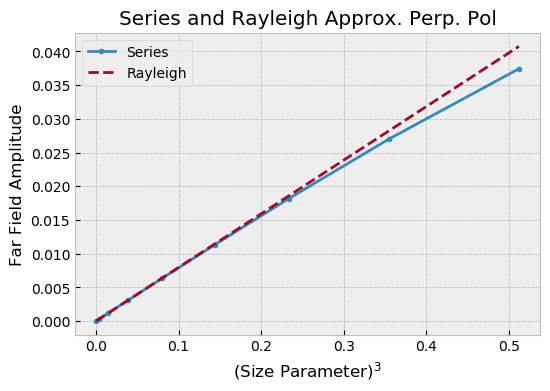

In [6]:
with plt.style.context('bmh'):
    fig,ax=plt.subplots(figsize=(6,4),facecolor='w')
    fig.set_dpi(100)
    ax.plot( (twopi*R)**3, FarField_Series.squeeze()[:,1].real,label='Series', marker='.')
    ax.plot( (twopi*R)**3, rayleigh_term_per.real,'--',label='Rayleigh')
    ax.set_xlabel('(Size Parameter)$^3$')
    ax.set_ylabel('Far Field Amplitude')
    ax.set_title('Series and Rayleigh Approx. Perp. Pol'.format(maxL))
    ax.legend()

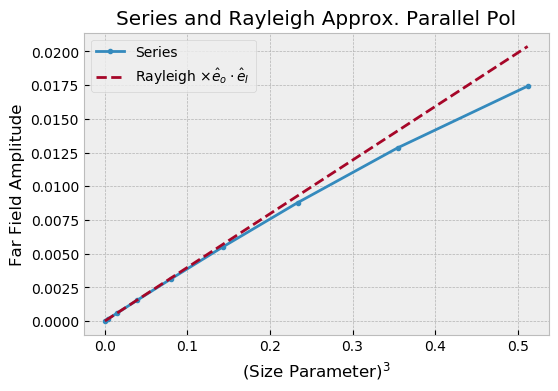

In [7]:
with plt.style.context('bmh'):
    fig,ax=plt.subplots(figsize=(6,4),facecolor='w')
    fig.set_dpi(100)
    ax.plot((twopi*R)**3, FarField_Series.squeeze()[:,0].real,label='Series', marker='.')
    ax.plot((twopi*R)**3, np.cos(theta)*rayleigh_term_par.real,'--',label=r'Rayleigh $\times \hat{e}_{o}\cdot\hat{e}_{I}$ ')
    ax.set_xlabel('(Size Parameter)$^3$')
    ax.set_ylabel('Far Field Amplitude')
    ax.set_title(r'Series and Rayleigh Approx. Parallel Pol'.format(maxL))
    ax.legend()